# Tutorial 2: Use cases

Here are some more examples on how you can query the PyCoMdb using either a keyword or combination of keywords, followed by one example of how to interpret coevolution matrix data.

Query by:

1. [UniProtID](#uniprotid)
2. [Sequence](#sequence)
3. [EC/CATH](#ec-and-cath)
4. [Disease](#disease)
4. [Multiple Keywords](#multiple-keywords)
5. [Interpreting coevolution matrix](#interpreting-coevolution-matrix)

Import all the essential PyCoM classes...

In [1]:
from pycom import PyCom, ProteinParams,CoMAnalysis
import matplotlib.pyplot as plt

Setup the paths to the local database files if you are using PyCoM (local) i.e. with PyCoMdb on your computer.

In [ ]:
# Set the paths to the Database files
# obj_pycom = PyCom(db_path='~/pycom.db', mat_path='/Volumes/SuperSpeedBoi/pycom.mat')

or you can use PyCoM with the remote version of PyCoMdb, uncomment or comment the code as per the right scenario.

In [2]:
obj_pycom = PyCom(remote=True)

### UniProtID

Using the UniProtID

In [3]:
query_parameters={ProteinParams.ID:"Q65209"}
# use for remote mode
entries_data_frame=obj_pycom.find(query_parameters,page=1)
# entries_data_frame=obj_pycom.find(query_parameters)
entries_data_frame

,uniprot_id,neff,sequence_length,sequence,organism_id,helix_frac,turn_frac,strand_frac,has_ptm,has_pdb,has_substrate
0,Q65209,6.062,141,MGNKESKYLEMCSEEAWLNIPNIFKCIFIRKLFYNKWLKYQEKKLK...,10498,0.0,0.0,0.0,0,0,0


### Sequence

Using the **complete** protein sequence, *using partial protein sequence will not yield any or incorrect result.*

In [4]:
entries_data_frame=obj_pycom.find({
   ProteinParams.SEQUENCE:"MGNKESKYLEMCSEEAWLNIPNIFKCIFIRKLFYNKWLKYQEKKLK"
}, page=1)

entries_data_frame

""


### EC and CATH

Using a combination of Enzyme Commission number and CATH ID. 

In [5]:
entries_data_frame=obj_pycom.find({
   ProteinParams.CATH:"1.*",
   ProteinParams.ENZYME:"3.2.*"
}, page=1)

entries_data_frame

,uniprot_id,neff,sequence_length,sequence,organism_id,helix_frac,turn_frac,strand_frac,has_ptm,has_pdb,has_substrate
0,A0A0S2UQQ5,8.393,380,MNITGKGAYDTGTYANLFQRSGYREDEIKARLEQTWNDLFYGDEHT...,198119,0.505263,0.052632,0.131579,0,1,1
1,A0A168WVR6,8.987,382,MDESNLLQGISMIDLRSPDAILSDYAKRYAHLLPELSPQLQQRMAY...,1081940,0.000000,0.000000,0.000000,0,0,1
2,A0R567,8.089,293,MSISPVELLSWYDHARRDLPWRRPGVSAWQILVSEFMLQQTPVSRV...,246196,0.000000,0.000000,0.000000,0,0,1
3,A1A048,8.357,379,MTNATDTNKTLGESMFAQCGYAQDAIDKRVSQVWHEIFEGPNKFYW...,367928,0.000000,0.000000,0.000000,0,0,1
4,A1D1W1,7.956,493,MHLPSLSVALALVSSSLALPQTVLPESDVSSHAAAVKEAFSHAWDG...,331117,0.000000,0.000000,0.000000,0,0,1
5,A3DBX3,10.164,334,MKNRVISLLMASLLLVLSVIVAPFYKAEAATVVNTPFVAVFSNFDS...,203119,0.038922,0.008982,0.365269,0,1,1
6,A3DC29,8.316,477,MKNVKKRVGVVLLILAVLGVYMLAMPANTVSAAGVPFNTKYPYGPT...,203119,0.379455,0.031447,0.058700,0,1,1
7,A7M7B9,8.207,281,MCAAAPRGGGRAARRLGAATAGSRVPSAAPRYSRRTRRVPIAYEAE...,9031,0.000000,0.000000,0.000000,0,0,1
8,A8GG79,9.140,366,MIDLREDTWTLQLYAQRYKGLSPKNSRELQLRMEYDPLKPNLPTSG...,399741,0.571038,0.035519,0.027322,0,1,1
9,B0KTG8,9.132,371,MIDLRSPNALLSDYVERYAHLSPEPSRQLQQRMDYNVRADAPAEPA...,76869,0.000000,0.000000,0.000000,0,0,1


We have found 153 proteins that match our search criteria i.e., proteins from CATH class `1.*` and EC class `3.2.*`.

### Disease

Getting proteins linked to a particular disease.

In [6]:
entries_data_frame = obj_pycom.find({
   ProteinParams.DISEASE:"Cancer"
}, page=1)

entries_data_frame

,uniprot_id,neff,sequence_length,sequence,organism_id,helix_frac,turn_frac,strand_frac,has_ptm,has_pdb,has_substrate
0,O00358,5.065,373,MTAESGPPPPQPEVLATVKEERGETAAGAGVPGEATGRGAGGRRRK...,9606,0.000000,0.000000,0.000000,1,0,0
1,O15105,6.671,426,MFRTKRSALVRRLWRSRAPGGEDEEEGAGGGGGGGELRGEGATDSR...,9606,0.000000,0.000000,0.014085,1,1,0
2,O43502,9.997,376,MRGKTFRFEMQRDLVSFPLSPAVRVKLVSAGFQTAEELLEVKPSEL...,9606,0.000000,0.000000,0.000000,0,0,0
3,O43542,10.237,346,MDLDLLDLNPRIIAAIKKAKLKSVKEVLHFSGPDLKRLTNLSSPEV...,9606,0.000000,0.000000,0.000000,0,0,0
4,O75771,10.597,328,MGVLRVGLCPGLTEEMIQLLRSHRIKTVVDLVSADLEEVAQKCGLS...,9606,0.109756,0.000000,0.000000,0,1,0
5,P01111,12.817,189,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,0.349206,0.015873,0.227513,1,1,1
6,P01112,12.841,189,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,0.317460,0.031746,0.359788,1,1,1
7,P01116,12.626,189,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,9606,0.375661,0.031746,0.328042,1,1,1
8,P04637,5.749,393,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,9606,0.206107,0.066158,0.262087,1,1,0
9,P08118,7.621,114,MNVLLGSVVIFATFVTLCNASCYFIPNEGVPGDSTRKCMDLKGNKH...,9606,0.026316,0.026316,0.421053,0,1,0


That's 29 proteins with known association to cancer.

### Multiple Keywords

In [7]:
entries_data_frame = obj_pycom.find({
   ProteinParams.CATH:"1.*",
   ProteinParams.DISEASE:"Cancer"
}, page=1)

entries_data_frame

,uniprot_id,neff,sequence_length,sequence,organism_id,helix_frac,turn_frac,strand_frac,has_ptm,has_pdb,has_substrate
0,O00358,5.065,373,MTAESGPPPPQPEVLATVKEERGETAAGAGVPGEATGRGAGGRRRK...,9606,0.0,0.0,0.0,1,0,0
1,P10914,5.137,325,MPITRMRMRPWLEMQINSNQIPGLIWINKEEMIFQIPWKHAAKHGW...,9606,0.0,0.0,0.0,1,0,0
2,Q96BI1,11.891,424,MQGARAPRDQGRSPGRMSALGRSSVILLTYVLAATELTCLFMQFSI...,9606,0.0,0.0,0.0,0,0,0


We found 3 proteins from CATH class `1.*` i.e., mainly alpha helical proteins. For help on [CATH Heirarchy](http://cathdb.info/browse/tree).

### Interpreting coevolution matrix

Now let's get the coevolution matrices for these 3 proteins and understand how to interpret the data using one of the proteins `O00358`.

In [8]:
# Rerun the last query, but this time load the coevolution matrices (by setting matrix=True)

entries_data_frame = obj_pycom.find({
   ProteinParams.CATH:"1.*",
   ProteinParams.DISEASE:"Cancer"
}, page=1, matrix=True)

entries_data_frame.iloc[0]

uniprot_id                                                    O00358
neff                                                           5.065
sequence_length                                                  373
sequence           MTAESGPPPPQPEVLATVKEERGETAAGAGVPGEATGRGAGGRRRK...
organism_id                                                     9606
helix_frac                                                       0.0
turn_frac                                                        0.0
strand_frac                                                      0.0
has_ptm                                                            1
has_pdb                                                            0
has_substrate                                                      0
matrix             [[0.0, 0.05772481486201286, 0.0409208163619041...
Name: 0, dtype: object

Coevolution matrix ($C_{i}$) for each protein has coevolution scores $c_{ij}$ for all residue pairs `i` & `j`.

Residue pairs with coevolution score $c_{ij} \geq \langle C_{i}\rangle$ are considered significant, therefore $C_{i}$ is scaled by average $\langle C_{i}\rangle$ as shown below:

$S_{i} = \frac{C_{i}}{\langle C_{i}\rangle}$

**Note**: All $c_{ij} \leq \langle C_{i}\rangle$ are set to `0`

To compare coevolution scores between two or more proteins, $S_{i}$ are normalised ($N_{i}$) as shown below:

$N_{i} = \frac{S_{i}}{max\langle {S_{i}...S_{N}} \rangle}$

In [9]:
# scale and normalise the coevolution matrices and add them to the dataframe
obj_com_analysis = CoMAnalysis()
entries_data_frame = obj_com_analysis.scale_and_normalise_coevolution_matrices(entries_data_frame)

# We have 3 proteins, so we will have 3 matrices
entries_data_frame['uniprot_id']

0    O00358
1    P10914
2    Q96BI1
Name: uniprot_id, dtype: object

For the first protein, lets get the top scoring residues pairs from the 90th percentile:

In [10]:
#for matrix in entries_data_frame['matrix_S']:
df_top_scoring_residues = obj_com_analysis.get_top_scoring_residues(entries_data_frame['matrix_S'][0],percentile=90)
df_top_scoring_residues

,ResA,ResB,coevolution_score
0,81,134,3.114167
1,333,360,3.075198
2,1,8,2.830141
3,320,367,2.802745
4,232,345,2.790903
...,...,...,...
6069,13,27,1.406554
6070,196,281,1.406419
6071,70,172,1.406395
6072,194,249,1.406223


Residues 81 and 134 have the strongest coevolution signal/score of 3.11, i.e., there is a very high chance that a mutation in one has a resulted in a change in the other residue. For example studies please refer to:
1. [Bai et al.](https://www.pnas.org/doi/full/10.1073/pnas.1615932113)
2. [Hopf et al.](https://www.nature.com/articles/nbt.3769#MOESM20)
3. [Akere et al.](https://doi.org/10.1042/BCJ20200477)

It is also very interesting to check which residue is the most coevolving, i.e., involved in most number of strongly coevolving pairs and which residue is the least coevolving, i.e., is involved in the least number of pairs. 

In [11]:
df_residue_frequencies=obj_com_analysis.get_residue_frequencies(df_top_scoring_residues)

df_residue_frequencies

,residueID,count
0,81,39
1,333,46
2,1,17
3,320,35
4,232,34
...,...,...
364,365,29
365,355,8
366,353,12
367,354,8


In [12]:
# saving the residue frequencies to a csv file
fname = "output/csv/" + entries_data_frame['uniprot_id'][0] + "_res_freqs.csv"
df_residue_frequencies.to_csv(fname,index=False)

In [13]:
#saving the top scoring residue pairs to a csv file
obj_com_analysis.save_top_scoring_residue_pairs(entries_data_frame,matrix_type='matrix_S',data_folder="output/csv")

Let us compare if the range of the coevolution scores for the top 10% of the residue pairs is different or similar for the three proteins.

In [14]:
list_top_residue_stats = []
for uniprotid,matrix in zip(entries_data_frame['uniprot_id'],entries_data_frame['matrix_S']):
    df_residue_pairs_scores = obj_com_analysis.get_top_scoring_residues(matrix,percentile=90)
    list_top_residue_stats.append(df_residue_pairs_scores['coevolution_score'])

In [15]:
my_color="#6495ED"
ticks_font=12
labels_font=14

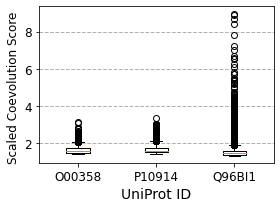

In [16]:
plt.figure(figsize=(4,3))
plt.boxplot(list_top_residue_stats)
plt.xticks(range(1, len(list_top_residue_stats) + 1), entries_data_frame['uniprot_id'])
plt.xlabel("UniProt ID",fontsize=labels_font)
plt.ylabel("Scaled Coevolution Score ",fontsize=labels_font-2)
plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.grid(axis='y',ls="--",lw=1)
plt.tight_layout()
plt.savefig("output/png/04_box_plot.png",dpi=300,transparent=True)

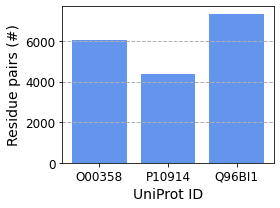

In [17]:
plt.figure(figsize=(4,3))
plt.bar(
   range(0,len(list_top_residue_stats),1),
   height=[len(pair_list) for pair_list in list_top_residue_stats],
   color=my_color,
   tick_label=entries_data_frame['uniprot_id']
)

plt.xlabel("UniProt ID",fontsize=labels_font)
plt.ylabel("Residue pairs (#)",fontsize=labels_font)
plt.xticks(fontsize=ticks_font)
plt.yticks(fontsize=ticks_font)
plt.grid(axis='y',ls="--",lw=1)
plt.tight_layout()
plt.savefig("output/png/04_bar_plot.png",dpi=300,transparent=True)

Based on the box plot the range of scaled coevolution scores is different between the three proteins and the bar plot, the number of residue pairs is also different. 